Table of contents  
-Import packages  
-Import Data  
-Explore Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Confirm the disk location is correct for importing
cwd = os.getcwd()
print(cwd)

C:\Users\steve\Documents\springboard\storytelling


In [3]:
#import data
df=pd.read_csv('pet_adoption_data.csv')

In [4]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [6]:
df.nunique()

PetID                 2007
PetType                  4
Breed                    7
AgeMonths              179
Color                    5
Size                     3
WeightKg              2007
Vaccinated               2
HealthCondition          2
TimeInShelterDays       89
AdoptionFee            493
PreviousOwner            2
AdoptionLikelihood       2
dtype: int64

In [24]:
df.describe()

,PetID,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,SizeNum
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,1503.000000,92.279522,15.705776,0.701046,0.196313,43.974091,249.142003,0.301943,0.328351,1.983558
std,579.515315,52.148363,8.327749,0.457914,0.397307,25.740253,142.887040,0.459215,0.469730,0.802680
min,500.000000,1.000000,1.018198,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1001.500000,48.000000,8.730396,0.000000,0.000000,21.000000,127.000000,0.000000,0.000000,1.000000
50%,1503.000000,94.000000,15.925416,1.000000,0.000000,45.000000,242.000000,0.000000,0.000000,2.000000
75%,2004.500000,138.000000,22.737180,1.000000,0.000000,66.000000,375.000000,1.000000,1.000000,3.000000
max,2506.000000,179.000000,29.995628,1.000000,1.000000,89.000000,499.000000,1.000000,1.000000,3.000000


In [7]:
df.PetType.value_counts()

PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64

In [23]:
df.Breed.value_counts()

Breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64

In [8]:
df['SizeNum'] = df['Size'].map({'Small': 1, 'Medium': 2, 'Large': 3})
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,SizeNum
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,3
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,3
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,2
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,1
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,3


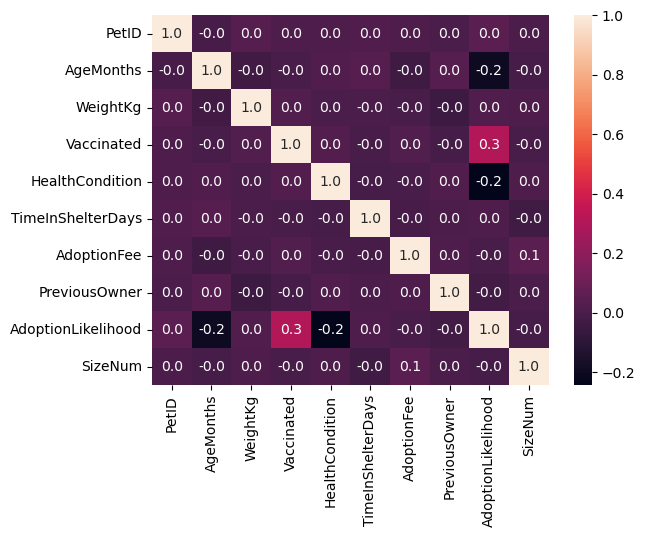

In [108]:
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt=".1f");
plt.savefig('heatmap.png', bbox_inches='tight')

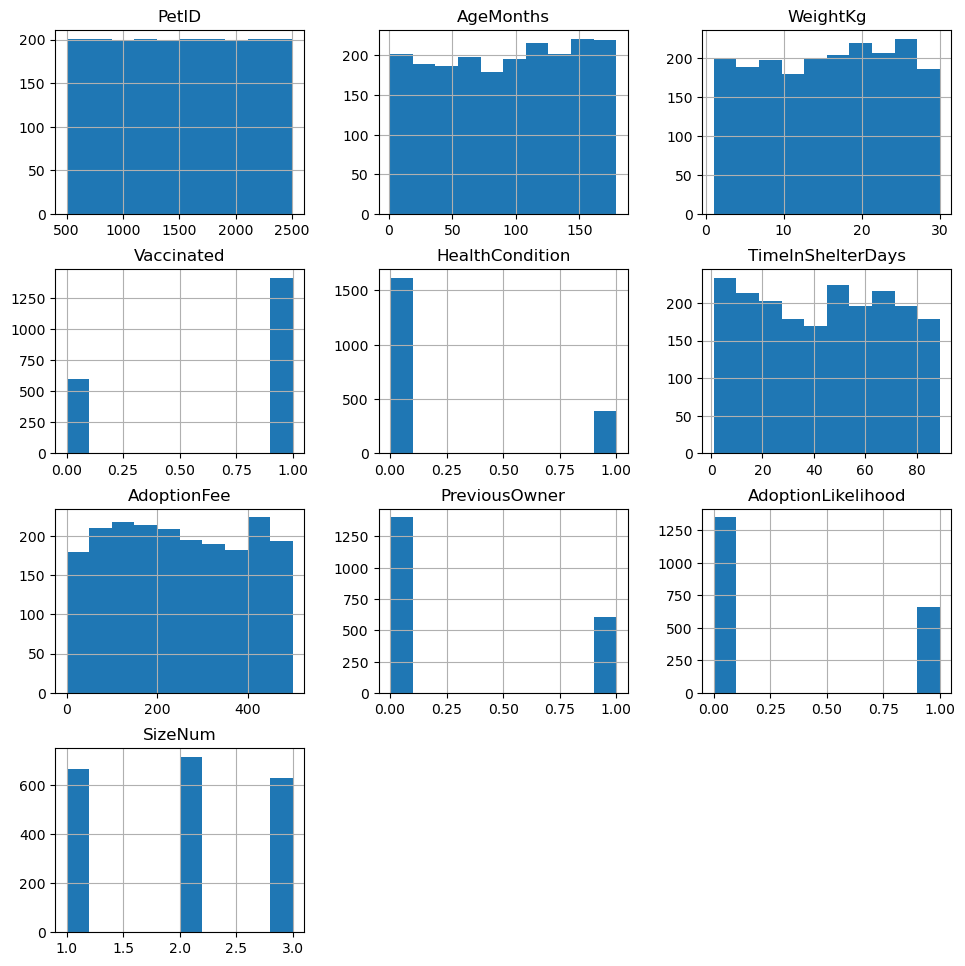

In [10]:
df.hist()
plt.subplots_adjust(bottom=-1, left=-.5) 
plt.show()

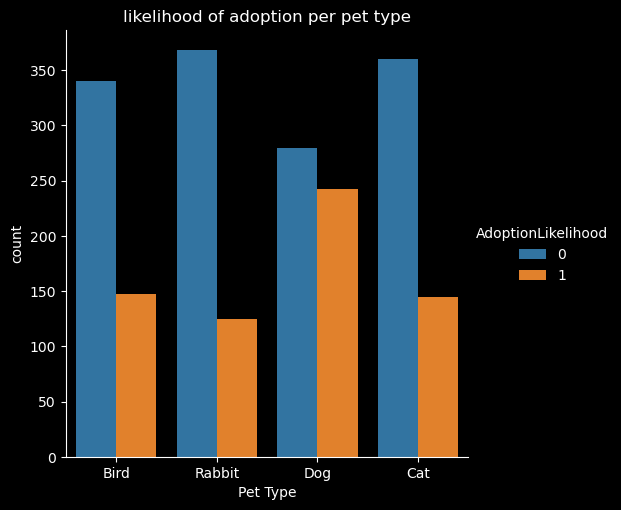

In [142]:
sns.catplot(x='PetType', data=df, kind='count', hue='AdoptionLikelihood')
plt.xlabel('Pet Type')
plt.ylabel('count')
plt.title('likelihood of adoption per pet type')
plt.savefig('PetType.png',bbox_inches='tight')


In [97]:
Type_Percent = df.groupby('PetType')['AdoptionLikelihood'].value_counts().unstack()
Type_Percent['Total'] =Type_Percent[0]+Type_Percent[1]
Type_Percent['Percent'] = round((Type_Percent[1]/Type_Percent['Total'])*100)
Type_Percent = Type_Percent.sort_values(by='Percent', ascending=False)

Type_Percent.head()


AdoptionLikelihood,0,1,Total,Percent
PetType,,,,
Dog,280,242,522,46.0
Bird,340,147,487,30.0
Cat,360,145,505,29.0
Rabbit,368,125,493,25.0


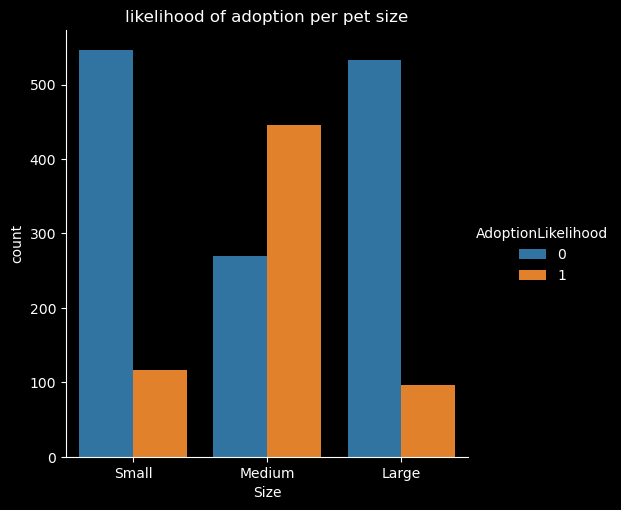

In [141]:
sns.catplot(x='Size', data=df, kind='count', hue='AdoptionLikelihood', order=['Small', 'Medium', 'Large'])
plt.xlabel('Size')
plt.ylabel('count')
plt.title('likelihood of adoption per pet size')
plt.savefig('PetSize.png',bbox_inches='tight')

In [14]:
Size_Percent = df.groupby('Size')['AdoptionLikelihood'].value_counts().unstack()
Size_Percent['Total'] =Size_Percent[0]+Size_Percent[1]
Size_Percent['Percent'] = round((Size_Percent[1]/Size_Percent['Total'])*100)
Size_Percent = Size_Percent.sort_values(by='Percent', ascending=False)
Size_Percent.head()

AdoptionLikelihood,0,1,Total,Percent
Size,,,,
Medium,269,445,714,62.0
Small,546,117,663,18.0
Large,533,97,630,15.0


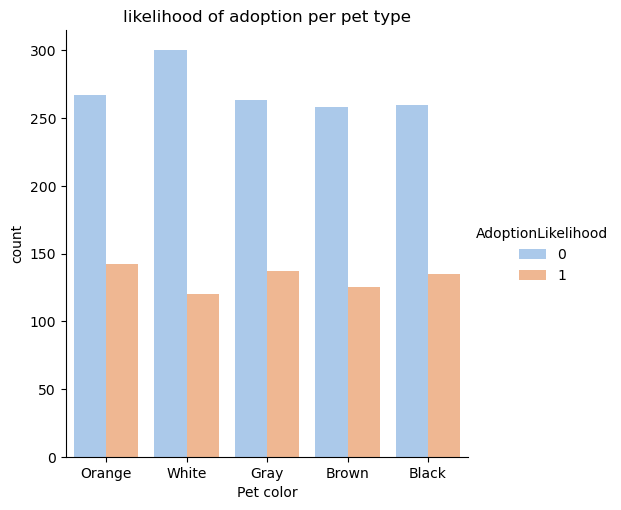

In [99]:
sns.catplot(x='Color', data=df, kind='count', hue='AdoptionLikelihood', palette='pastel')
plt.xlabel('Pet color')
plt.ylabel('count')
plt.title('likelihood of adoption per pet type')
plt.show()


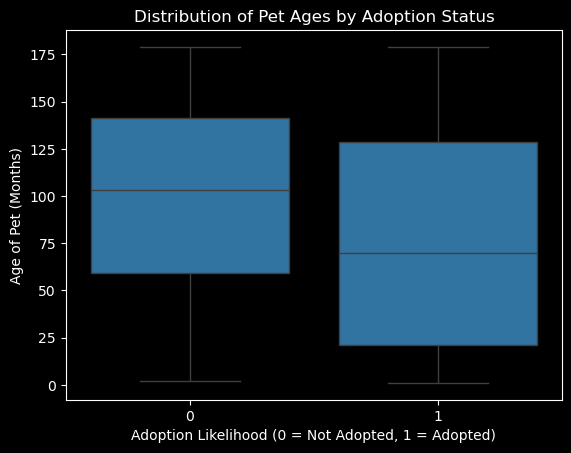

In [140]:
sns.boxplot(x='AdoptionLikelihood', y='AgeMonths', data=df)
plt.xlabel('Adoption Likelihood (0 = Not Adopted, 1 = Adopted)')
plt.ylabel('Age of Pet (Months)')
plt.title('Distribution of Pet Ages by Adoption Status')
plt.savefig('PetAgeBox.png', bbox_inches='tight')

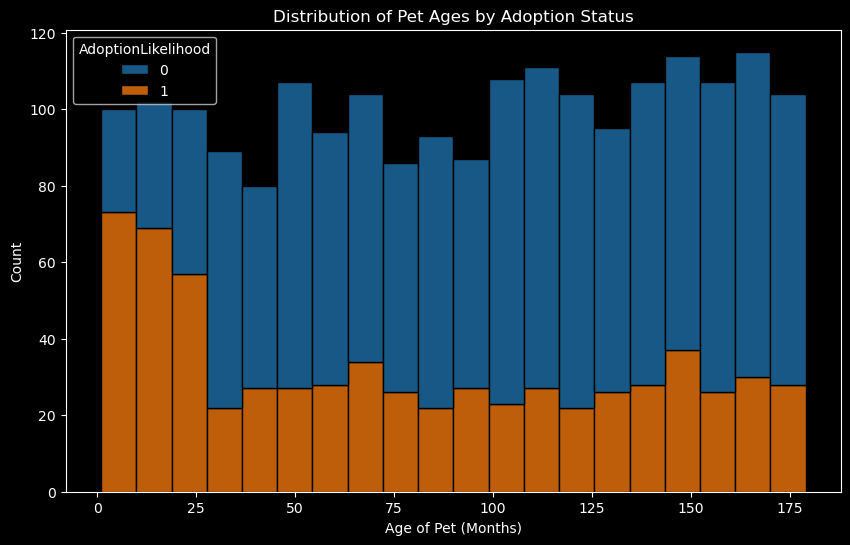

In [139]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AgeMonths', hue='AdoptionLikelihood', multiple='stack', bins=20)
plt.xlabel('Age of Pet (Months)')
plt.ylabel('Count')
plt.title('Distribution of Pet Ages by Adoption Status')
plt.savefig('PetAgeHist.png', bbox_inches='tight')

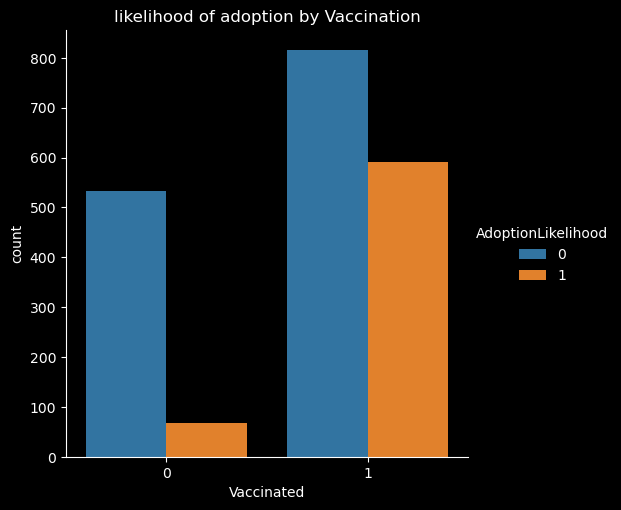

In [138]:
sns.catplot(x='Vaccinated', data=df, kind='count', hue='AdoptionLikelihood')
plt.xlabel('Vaccinated')
plt.ylabel('count')
plt.title('likelihood of adoption by Vaccination')
plt.savefig('PetVax.png', bbox_inches='tight')

In [90]:
vax_Percent = df.groupby('Vaccinated')['AdoptionLikelihood'].value_counts().unstack()
vax_Percent['Total'] =vax_Percent[0]+vax_Percent[1]
vax_Percent['Percent'] = round((vax_Percent[1]/vax_Percent['Total'])*100)
vax_Percent = vax_Percent.sort_values(by='Percent', ascending=False)
vax_Percent.head()

AdoptionLikelihood,0,1,Total,Percent
Vaccinated,,,,
1,815,592,1407,42.0
0,533,67,600,11.0


In [93]:
health_Percent = df.groupby('HealthCondition')['AdoptionLikelihood'].value_counts().unstack()
health_Percent['Total'] =health_Percent[0]+health_Percent[1]
health_Percent['Percent'] = round((health_Percent[1]/health_Percent['Total'])*100)
health_Percent = health_Percent.sort_values(by='Percent', ascending=False)
health_Percent.head()

AdoptionLikelihood,0,1,Total,Percent
HealthCondition,,,,
0,992,621,1613,38.0
1,356,38,394,10.0


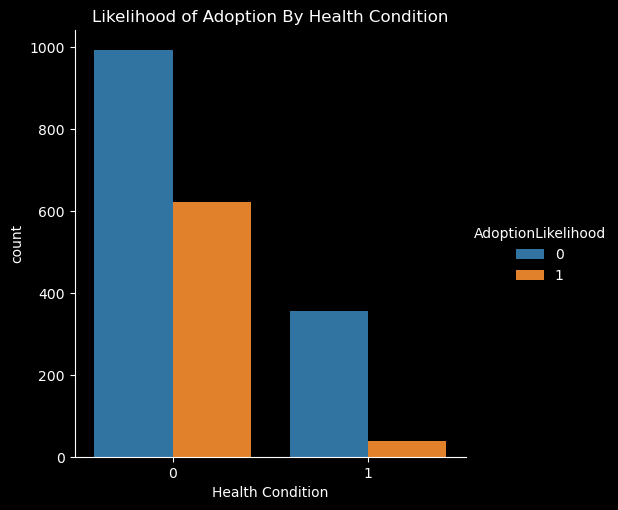

In [137]:
sns.catplot(x='HealthCondition', data=df, kind='count', hue='AdoptionLikelihood', )
plt.xlabel('Health Condition')
plt.ylabel('count')
plt.title('Likelihood of Adoption By Health Condition')
plt.savefig('PetHealth.png', bbox_inches='tight')

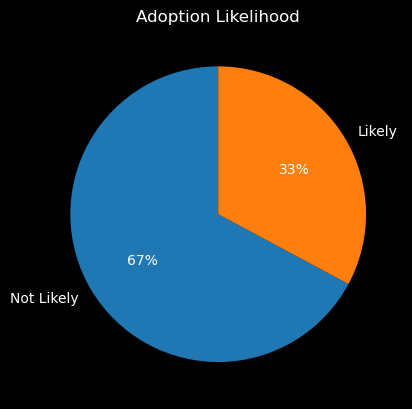

In [135]:
colors = ['#AEC6CF', '#FFDAB9']
plt.pie(df['AdoptionLikelihood'].value_counts(), labels=['Not Likely', 'Likely'], autopct='%1.0f%%', startangle=90)
plt.title("Adoption Likelihood")
plt.savefig('PetAdopt.png', bbox_inches='tight')

In [134]:
from matplotlib import rcParams

# Update default settings for the style
rcParams['axes.facecolor'] = 'black'  # Background of the plot area
rcParams['axes.edgecolor'] = 'white'  # Edge color
rcParams['axes.labelcolor'] = 'white'  # Label color
rcParams['xtick.color'] = 'white'  # X-axis tick color
rcParams['ytick.color'] = 'white'  # Y-axis tick color
rcParams['figure.facecolor'] = 'black'  # Background of the figure
rcParams['text.color'] = 'white'  # Text color
rcParams['grid.color'] = 'gray'  # Gridline colo

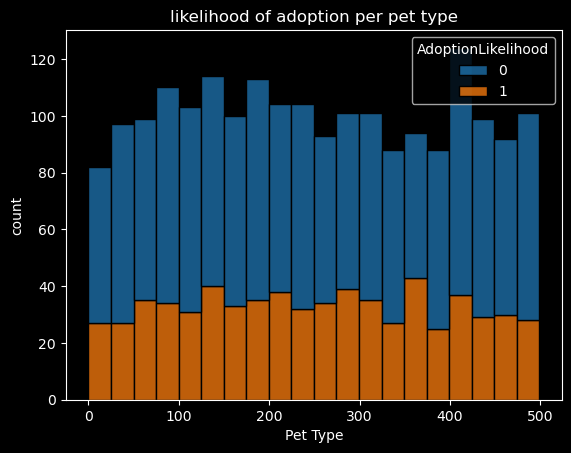

In [144]:
sns.histplot(data=df, x='AdoptionFee', hue='AdoptionLikelihood', multiple='stack', bins=20)
plt.xlabel('Pet Type')
plt.ylabel('count')
plt.title('likelihood of adoption per pet type')
plt.savefig('PetType.png',bbox_inches='tight')
